In [3]:
import pandas as pd

# Load the dataset to inspect the first few rows and understand its structure
file_path = 'C:/Users/User/Desktop/Udemy Course/Sample - Superstore.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Attempt to read the CSV file with a different encoding
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

(None,
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
 0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
 3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ...  \
 0      Claire Gute   Consumer  United States        Henderson  ...   
 1      Claire Gute   Consumer  United States        Henderson  ...   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 
   Postal Code  Region       Product ID         Category Sub-Category  

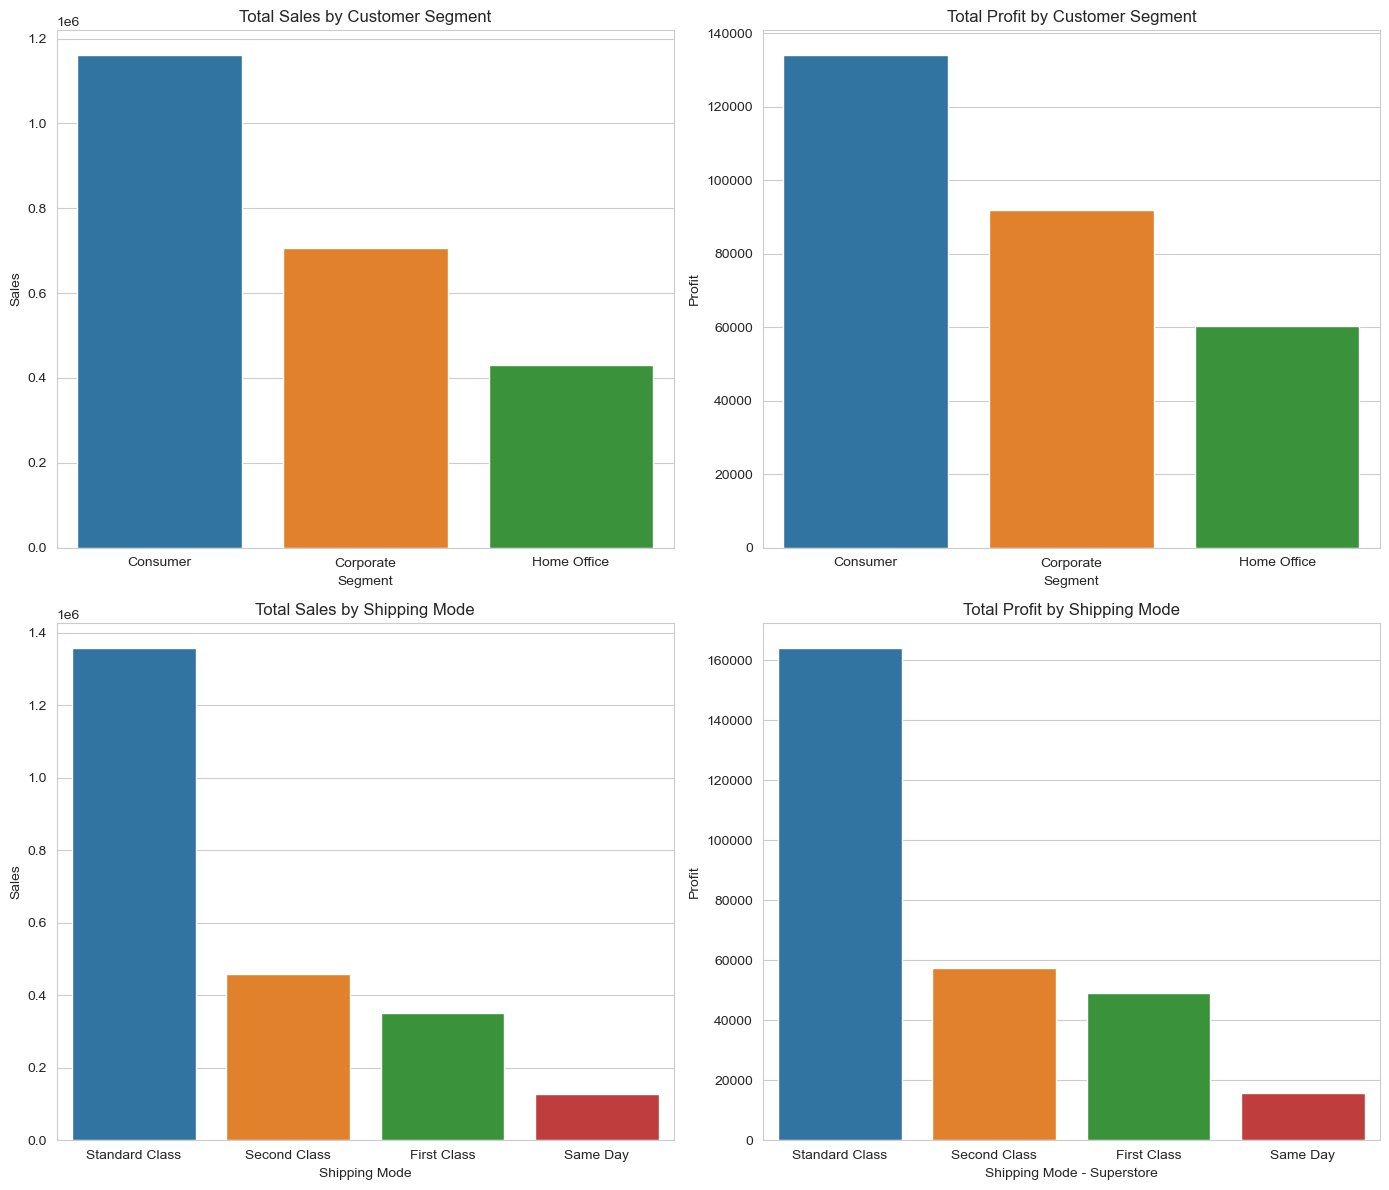

In [9]:
# Plotting sales and profit by customer segment and shipping mode

# Recompute the necessary dataframes
segment_sales_profit = data.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
ship_mode_sales_profit = data.groupby('Ship Mode')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Sales by Customer Segment
sns.barplot(x=segment_sales_profit.index, y='Sales', data=segment_sales_profit, ax=axes[0, 0])
axes[0, 0].set_title('Total Sales by Customer Segment')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].set_xlabel('Segment')

# Profit by Customer Segment
sns.barplot(x=segment_sales_profit.index, y='Profit', data=segment_sales_profit, ax=axes[0, 1])
axes[0, 1].set_title('Total Profit by Customer Segment')
axes[0, 1].set_ylabel('Profit')
axes[0, 1].set_xlabel('Segment')

# Sales by Shipping Mode
sns.barplot(x=ship_mode_sales_profit.index, y='Sales', data=ship_mode_sales_profit, ax=axes[1, 0])
axes[1, 0].set_title('Total Sales by Shipping Mode')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].set_xlabel('Shipping Mode')

# Profit by Shipping Mode
sns.barplot(x=ship_mode_sales_profit.index, y='Profit', data=ship_mode_sales_profit, ax=axes[1, 1])
axes[1, 1].set_title('Total Profit by Shipping Mode')
axes[1, 1].set_ylabel('Profit')
axes[1, 1].set_xlabel('Shipping Mode - Superstore')

plt.tight_layout()
plt.show()
